# Pytorch Tensor

## Tensor 생성


In [31]:
import torch

# 정수형 int64 기본형 (long)
# 실수형 float32 기본형
t1 = torch.tensor([1, 2, 3])
t1 = torch.tensor([1, 2, 3], dtype=torch.float)
print(t1)
print(type(t1))
print(t1.dtype)
print(t1.shape)
print(t1.size())
print(t1.dim())
print(t1.device) # cpu에 적재되어 있다

OSError: [WinError 127] 지정된 프로시저를 찾을 수 없습니다. Error loading "c:\Users\TJ\anaconda3\envs\ai_env\Lib\site-packages\torch\lib\shm.dll" or one of its dependencies.

In [ ]:
t2 = torch.tensor([[1., 2., 3.],
                   [4., 5., 6.]])
print(t2)
print(type(t2))
print(t2.dtype)
print(t2.shape)
print(t2.size())
print(t2.dim())
print(t2.device)

In [32]:
# 0 또는 1로 tensor 생성
print(torch.ones(2,3)) # 자료형 float32

print(torch.zeros(2,3, dtype=torch.int))

x = torch.tensor([[1., 2., 3.],
                  [4., 5., 6.]])

print(torch.ones_like(x))
# ==> x와 똑같은 shape와 type으로 tensor를 만들어라 (1)

print(torch.zeros_like(x))



NameError: name 'torch' is not defined

In [ ]:
# 난수 생서
# - 정규분포
print(torch.normal(10, 1, (2, 2) )) # 평균 표준편차 크기
# ==> 평균이 10이고 표준편차가 1인 크기가 2,2 인 정규분포 생성

print(torch.randn(2,2)) # 크기
print(torch.randn_like(x.float())) # long -> float 변환 후 처리
# ==> x랑 똑같은 shape, device, shape으로 정규분포를 만드는데
#     x의 모양을 float으로 변환한 다음에 해라

# - 균등분포
print(torch.rand(2,2) ) # 0 ~ 1 사이
print(torch.randint(1, 10, (2,2))) # 1 이상 10 미만
print(torch.rand_like(x.float())) # 0 ~ 1 사이 균등분포

# - 그 외
print(torch.empty(2,3)) # 초기화되지 않은 텐서(쓰레기값) (==> 가 만들어짐)
# ==> 메모리만 확보하고 값을 설정을 안함
# ==> 이전에 사용했던 메모리값(쓰레기값)이 그대로 출력됨


In [ ]:
# numpy ndarray 호환
import numpy as np

x = np.array([1, 2, 3])
print(x, type(x))

t = torch.from_numpy(x)
print(t, type(t))

x2 = t.numpy()
print(x2, type(x2))

## 연산

In [ ]:
a = torch.tensor([[1, 2, 3],
                  [4, 5, 6]], dtype=torch.float)

b = torch.tensor([[7, 8, 9],
                  [10, 11, 12]], dtype=torch.float)

c = torch.tensor([[1,2],
                  [3,4],
                  [5,6]], dtype=torch.float)
print(a.shape, b.shape, c.shape)

In [ ]:
print(a + b)
print(a - b)
print(a * b)
print(a / b)
print(a // b)
print(a % b)

In [ ]:
# broadcasting 연산
print(a + 1)
print(a + torch.tensor([10, 20, 30]))
# ==> (2,3) + (1,3)

# print(a + torch.tensor([10, 20]))
# 마지막 축부터 검사 : 1 또는 숫자가 같지 않은 경우 브로드케스팅 불가
# ==> (2,3) + (2,2)
# ==> 연산 불가로 오류남

In [ ]:
# 내적 (모든 원소간의 곱을 더하기)
# 1차원 : torch.dot(), torch.matmul(), @
# 2차원 이상 : torch.matmul(), @

m = torch.tensor([1,2,3])
n = torch.tensor([4,5,6])

# ==> (1 * 4) + (2 * 5) + (3 * 6)

print(m.dot(n))
print(torch.dot(m,n))
print(torch.matmul(m,n))
print(m @ n)

In [ ]:
# 2차원 이상

print(a.matmul(c)) # (2, 3) @ (3, 2)
print(a @ c)

# print(torch.dot(a,c))
# RuntimeError: 1D tensors expected, but got 2D and 2D tensors



## 통계연산
축을 지정해서 연산하는 sum, mean, max, min 등

In [ ]:
# 합계
"""
[[1, 2, 3],
 [4, 5, 6]]
"""
print(torch.sum(a, dim=0))
# ==> dim=0 : 행을 없앤다 -> 열끼리 더함
# => tensor([5., 7., 9.])
print(torch.sum(a, dim=1))
# ==> dim=0 : 열을 없앤다 -> 행끼리 더함
# => tensor([ 6., 15.])
print(torch.sum(a, dim=None))


# 평균
print(torch.mean(a, dim=0))
# =>
print(torch.mean(a, dim=1))
# =>
print(torch.mean(a, dim=None))
# =>


## 형변환
astype 대신 해당 자료형 메소드 호출

In [ ]:
x = torch.tensor([1, 2, 3])
print(x, x.dtype)
# => tensor([1, 2, 3]) torch.int64

print(x.float(), x.float().dtype)
# => tensor([1., 2., 3.]) torch.float32

print(x.double(), x.double().dtype)
# => tensor([1., 2., 3.], dtype=torch.float64) torch.float64

print(x.int(), x.int().dtype)
# => tensor([1, 2, 3], dtype=torch.int32) torch.int32

print(x.long(), x.long().dtype)
# => tensor([1, 2, 3]) torch.int64

## 형태변경

In [ ]:
t = torch.arange(12) # start, stop, step
# t
# => tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

t_ = t.reshape(3, 4)
t_ = t.reshape(3, -1)
t_ = t.reshape(-1, 4)
t_ = t.reshape(2, 2, 3)

print(t_, '\n', t_.size())

In [ ]:
# 전치
t = torch.arange(12).reshape(3, 4)
print(t.T, '\n', t.T.shape)

print(t.transpose(0, 1), '\n', t.transpose(0, 1).shape)
# ==> transpose(0, 1) : 0차원이랑 1차원 바꿔주세요

In [ ]:
# 평탄화
print(t.flatten())
print(t.reshape(-1))

In [ ]:
# 차원 축소 squeeze()
x = torch.tensor([[[1,2],[3,4]]])
print(x.size())

print(x.squeeze(0), x.squeeze(0).shape)


In [ ]:
# 차원 추가 unsqeeze()
x = torch.tensor([[1,2],[3,4]])
print(x.size())

x_ = x.unsqueeze(0)
x_ = x.unsqueeze(-1)
x_ = x.unsqueeze(1)
print(x_.size())
print(x_)

## indexing | slicing

In [ ]:
x = torch.arange(1,13).reshape(3,2, 2)
x

In [ ]:
x[0]

In [ ]:
# x[1][0]
x[1, 0]

In [ ]:
# x[2, 1]
x[-1, -1]

In [ ]:
# x[-1, 0][1]
# x[-1, -2, -1]
# x[-1, 0, 1]
x[-1, 0, -1]

In [ ]:
# slicing
x_ = x[:,0] # 인덱싱을 사용한 1차원 제거
x_ = x[:,:1] # 슬라이싱은 차원이 유지된다.
print(x_)
print(x_.shape)

In [ ]:
# fancy indexing
index = [1,2]
x_ = x[index]
print(x_.shape)
print(x_)

## 유용한 메소드

In [ ]:
# split
# - 지정한 개수로 분할, 마지막은 지정한 개수보다 작을 수 있다
x = torch.zeros(10, 4)
x_splits = torch.split(x, 4)
x_splits

In [ ]:
# expand : 해당 차원의 데이터를 반복 확장
k = torch.tensor([ [[1,2]],
                   [[3,4]] ])

print(k.shape)

k_exp = k.expand(2, 3, 2)
print(k_exp)
print(k_exp.shape)

In [ ]:
# 원본 배열 k의 view 형태로 k_exp가 생성된 것이다.
# k_exp가 k를 참조, k_exp를 변경하면 원본 배열로 변경된다
k_exp[0,0,0] = 100
print(k_exp)
""" =>
tensor([[[100,   2],
         [100,   2],
         [100,   2]],

        [[  3,   4],
         [  3,   4],
         [  3,   4]]])
"""
# ==> 얕은복사

print(k)
""" =>
tensor([[[100,   2]],

        [[  3,   4]]])
"""

In [ ]:
# repeat : 원본 배열의 view 생성 없이 실제 값 복사

k = torch.tensor([ [[1,2]],
                   [[3,4]] ])

print(k.shape)

k_rep = k.repeat(1, 3, 1)
# ==> 차원별로 반복 횟수 지정 -> 1이면 그대로, 3이면 3번 반복
print(k_rep)
print(k_rep.shape)

k_rep[0,0,0] = 100
print(k_rep)
print(k)

In [ ]:
# masked_fill : mask 조건식이 true인 경우만 값 변경

x = torch.arange(9).reshape(3, -1)
print(x)

mask = x > 4
print(mask)

x_ = x.masked_fill(mask, value=0) # True인 위치를 0으로 채우기
print(x_)

x[mask] # True인 위치의 값

## 모델 학습에서 tensor 다차원 배열 연산

In [ ]:
import torch.nn as nn

# 단층 선형 연산
X = torch.randn(4, 5) # 입력
# X
''' =>
tensor([[ 1.4005,  0.6094, -0.8844, -1.5855, -0.6326],
        [-0.5946,  0.7354, -0.1496,  0.5515,  0.8959],
        [ 1.7973, -1.2305,  1.0632, -0.4779,  0.2471],
        [-0.3774, -0.6282, -0.2012,  0.5152,  0.6328]])
'''
# ==> 한 행 = 한샘플 -> 입력층 5개
# ==> 은닉층이 3개 있다고 치\면

W = torch.randn(5, 3) # Linear Layer 기준 (3개의 노드)
b = torch.randn(1, 3) # 노드마다 절편


# Linear층 계산
z = torch.matmul(X, W) + b
# ==> (4,5) @ (5,3) + (1,3)

# 활성화 함수 relu
# output = nn.ReLU()(z)

relu = nn.ReLU()
output = relu(z)

# output
""" =>
tensor([[0.9870, 3.4758, 0.1176],
        [0.0119, 0.0000, 0.0000],
        [0.0000, 2.6065, 0.0000],
        [0.0000, 0.0000, 0.0000]])
"""

In [ ]:
# Linear layer 클래스 사용
class SimpleNet(nn.Module):
    def __init__(self, input_dim, output_dim): # ==> 생성자
        super().__init__()
        self.layer = nn.Linear(input_dim, output_dim)
        # 선형층 W (input_dim, output_dim)
        # 선형층 b (1, output_dim)
        self.relu = nn.ReLU()


    def forward(self, x): # ==> 실제 동작
        z = self.layer(x)
        output = self.relu(z)
        return output

model = SimpleNet(input_dim=5, output_dim=3)
output = model(X)
print(output)


## 실습문제
### 💡 조건


* 입력: 샘플 수 6개, 특성 수 10개
* 은닉층: 입력 10 → 출력 8 (활성화 함수: `tanh`)
* 출력층: 입력 8 → 출력 4 (활성화 함수: `softmax`)
* PyTorch 사용






### 문제 1. 직접 가중치/절편을 선언하고 순전파 계산


다음 조건에 맞게 PyTorch 텐서를 사용하여 forward 계산을 수동으로 구현하세요.


**요구사항**


1. 입력 `X`는 `torch.randn(6, 10)` 으로 생성한다.
2. `W1`, `b1`, `W2`, `b2`도 torch의 `randn`을 이용해 직접 정의한다.
3. 은닉층에서는 `tanh`, 출력층에서는 `softmax`를 사용한다.
4. 최종 결과는 `(6, 4)` 크기의 확률 벡터이어야 한다.


### 문제 2. 위 네트워크를 PyTorch 모델 클래스로 작성


다음 조건에 맞는 `nn.Module` 클래스를 작성하세요.


**요구사항**


1. `__init__`에 `nn.Linear(10, 8)`과 `nn.Linear(8, 4)`를 정의한다.
2. `forward`에서는 `tanh` → `softmax` 순으로 활성화 함수를 적용한다.
3. 임의의 입력 `X = torch.randn(6, 10)`을 모델에 넣어 출력 결과를 확인한다.






### 문제3. 층별 가중치/편향 출력


모델 내 가중치와 편향 값을 확인하고 출력하세요.


In [ ]:
X = torch.randn(6, 10)

W1 = torch.randn(10, 8)
b1 = torch.randn(1, 8)

z = torch.matmul(X, W1) + b1

# 은닉 활성
hidden = nn.Tanh()(z)
# (6,8)

W2 = torch.randn(8, 4)
b2 = torch.randn(1, 4)
z2 = torch.matmul(hidden, W2) + b2
output = nn.Softmax(dim=0)(z2)
output


In [ ]:
class SimpleNet(nn.Module):

    def __init__(self): # ==> 생성자
        super().__init__()
        self.hidden = nn.Linear(10, 8)
        self.output = nn.Linear(8, 4)

        self.tanh = nn.Tanh() # 은닉 활성화

        self.softmax = nn.Softmax(dim=0) # 출력 활성화

    def forward(self, x): # ==> 실제 동작
        x = self.hidden(x) # ==> 은닉층 먼저 통과
        x = self.tanh(x) # ==> 은닉층에서 나온걸 활성화함수에 넣기
        x = self.output(x)  # ==> 출력층
        x = self.softmax(x) # ==> 출력층 활성화함수
        return x

model = SimpleNet()
output = model(X)
print(output)


In [ ]:
for name, i in model.state_dict().items():
    print(f'{name} : {i}\n')

In [28]:
#######################################################################
# 쌤버전
#######################################################################
# 1. 직접 가중치/절편을 선언하고 순전파 계산
import torch.nn.functional as F

X = torch.randn(6, 10)

# 은닉층 (10, 8) : 8개의 뉴런(노드)
W1 = torch.randn(10, 8)
b1 = torch.randn(1, 8)

# 은닉층 계산
z1 = X @ W1 + b1
z1 = F.tanh(z1)
print(z1.shape)

# 출력층 (8, 4) : 4개의 뉴런(노드)
W2 = torch.randn(8, 4)
b2 = torch.randn(1, 4)

# 출력층 계산
z2 = z1 @ W2 + b2
z2 = F.softmax(z2, dim=1)
print(z2.shape)

# 최종출력
print(torch.sum(z2, dim=1)) # 각 데이터 샘플별 합은 1
print(z2)
print(torch.argmax(z2, dim=1))


OSError: [WinError 127] 지정된 프로시저를 찾을 수 없습니다. Error loading "c:\Users\TJ\anaconda3\envs\ai_env\Lib\site-packages\torch\lib\shm.dll" or one of its dependencies.

In [ ]:
## 쌤버전 2번
# 2. 위 네트워크를 PyTorch 모델 클래스로 작성

class MultiLayerNet(nn.Module):

    def __init__(self, input_dim, num_classes):
        """
        :param input_dim: 입력 데이터의 차원 수 (특성)
        :param output_dim: 정답 클래스의 수
        """
        super().__init__()
        self.hidden = nn.Linear(input_dim, 8)
        self.tanh = nn.Tanh()
        self.output = nn.Linear(8, num_classes)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        z1 = self.hidden(x)
        z1 = self.tanh(z1) # (samples, 8)
        z2 = self.output(z1)
        z2 = self.softmax(z2) # (samples, num_classes)
        return z2

X = torch.randn(6, 10) # 입력데이터

model = MultiLayerNet(input_dim=X.size(1), num_classes=4)

# 순전파
output = model(X)
print(output)

# 클래스 예측
print(output.argmax(dim=1))

# 자동 미분 계산 그래프에서 분리 후 변환
print(output.detach().numpy())


In [ ]:
# 쌤버전
# 3. 층별 가중치/편향 출력
# - model.state_dict()
# - model.parameters()
# - model.layer

import pandas as pd

# 은닉층
layer = model.hidden
W = layer.weight.detach().numpy()
b= layer.bias.detach().numpy()
# 자동 미분 계산 그래프에서 분리 후 변환
# print(output.detach().numpy())

columns = ['W1', 'W2', 'W3', 'W4', 'W5', 'W6', 'W7', 'W8', 'W9', 'W10', 'b']
index = ['Node1', 'Node2', 'Node3', 'Node4', 'Node5', 'Node6', 'Node7', 'Node8']
pd.DataFrame(np.column_stack([W, b]), index=index, columns=columns)

# 가중치 : 모델이 가지고 있는 값
# 기울기 : 그 가중치를 어떻게 바꿀지 알려주는 값

In [ ]:
# 출력층
layer = model.output
W = layer.weight.detach().numpy()
b = layer.bias.detach().numpy()

W.shape, b.shape

columns = ['W1', 'W2', 'W3', 'W4', 'W5', 'W6', 'W7', 'W8', 'b']
index = ['Node1', 'Node2', 'Node3', 'Node4']
pd.DataFrame(np.column_stack([W, b]), index=index, columns=columns)

## 이미지 데이터 처리
- 컬러 이미지 한장(pytorch기준) : (채널, 높이 너비)
- 컬러 이미지 한장(matplotlib) : (높이, 너비, 채널)
- 컬러 이미지 여러장(pytorch) : (batch, 채널, 높이, 너비)

In [26]:
# 3차원 데이터(C, H, W)의 mean 연산
# - axis=0, Channel 축을 따라 평균 (H, W)
# - axis=1, Height 축을 따라 평균 (C, W)
# - axis=2, Width 축을 따라 평균 (C, H)

x = np.arange(1, 25).reshape(2, 3, 4)

print('axis=0 : ', x.mean(axis=0).shape) # => axis=0 :  (3, 4)
print('axis=1 : ', x.mean(axis=1).shape) # => axis=1 :  (2, 4)
print('axis=2 : ', x.mean(axis=2).shape) # => axis=2 :  (2, 3)
print('axis=0 : ', x.mean(axis=0))
print('axis=1 : ', x.mean(axis=1))
print('axis=2 : ', x.mean(axis=2))




axis=0 :  (3, 4)
axis=1 :  (2, 4)
axis=2 :  (2, 3)
axis=0 :  [[ 7.  8.  9. 10.]
 [11. 12. 13. 14.]
 [15. 16. 17. 18.]]
axis=1 :  [[ 5.  6.  7.  8.]
 [17. 18. 19. 20.]]
axis=2 :  [[ 2.5  6.5 10.5]
 [14.5 18.5 22.5]]


(3, 32, 32)
(32, 32)


TypeError: Invalid shape (3, 32, 32) for image data

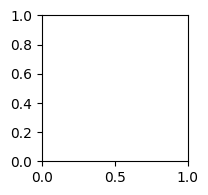

In [9]:
# 이미지 한장 시각화
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt



channels = 3 #rgb
height = 32
width = 32

# torch 이미지 순서
image = np.random.rand(channels, height, width)

# np.clip(arr, min, max) : arr 요소 중에 min보다 작은 값은 min으로,
#                          max보다 큰 값은 max로 클리핑
bright_image = np.clip(image + 0.2, 0, 1)
# print(bright_image)
print(bright_image.shape)
# => (3, 32, 32)

gray_image = np.mean(image, axis=0)
print(gray_image.shape)
# => (32, 32)

# pd.DataFrame(bright_image[0])


# 이미지 시각화
# plt.subplot(nrows, ncols, index)
# - index 1부터 시작
# - nrowncolsindex 순자 조합
plt.subplot(1, 3, 1)
# plt.subplot(131) # ==> nrowncolsindex 방식
plt.imshow(image)
# => TypeError: Invalid shape (3, 32, 32) for image data
# ==> 지금 pytorch 방식으로 만들어서 오류 발생


plt.show()

(3, 32, 32)
(32, 32)


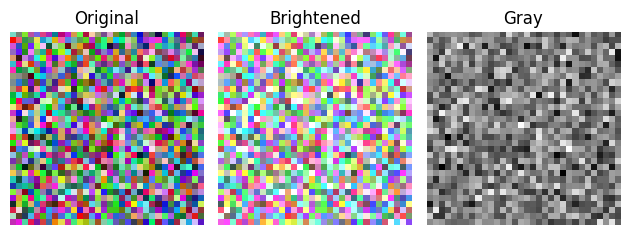

In [1]:
# 이미지 한장 시각화
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt



channels = 3 #rgb
height = 32
width = 32

# torch 이미지 순서
image = np.random.rand(channels, height, width)

# np.clip(arr, min, max) : arr 요소 중에 min보다 작은 값은 min으로,
#                          max보다 큰 값은 max로 클리핑
bright_image = np.clip(image + 0.2, 0, 1)
# print(bright_image)
print(bright_image.shape)
# => (3, 32, 32)

gray_image = np.mean(image, axis=0)
print(gray_image.shape)
# => (32, 32)


# 이미지 출력을 위한 변환
# (C, H, W) -> (H, W, C)
# ndarray.tramspose(*axes) : 원하는 축의 인덱스를 작성
image_trans = image.transpose(1, 2, 0)
bright_image_trans = bright_image.transpose(1,2,0)


# 이미지 시각화
# plt.subplot(nrows, ncols, index)
# - index 1부터 시작
# - nrowncolsindex 순자 조합
plt.subplot(1, 3, 1)
plt.imshow(image_trans)
plt.title('Original')
plt.axis('off')

plt.subplot(132)
plt.imshow(bright_image_trans)
plt.title('Brightened')
plt.axis('off')

plt.subplot(133)
plt.imshow(gray_image, cmap='gray')
plt.title('Gray')
plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# ==> 다크모드면 bright가 더 어두울수도 있음

(5, 3, 32, 32)
(5, 32, 32, 3)
(3, 32, 32)
(32, 32)


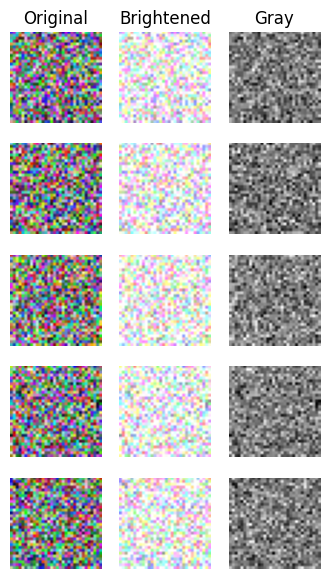

In [2]:
# 이미지 여러장

batch = 5 # 5장의 사진
channels = 3 # rgb
height = 32
width = 32

images = np.random.rand(batch, channels, height, width)
print(images.shape)
# => (5, 3, 32, 32)
# ==> (역순으로 해석) 세로32 가로32 인 색이 3개인 이미지가 5개 있다

# 이미지 시각화를 위한 채널차원 변경
# (B, C, H, W) -> (B, H, W, C)
# ndarray.tramspose(*axes) : 원하는 축의 인덱스를 작성
# ==> 0 1 2 3 -> 0 2 3 1
images = images.transpose((0, 2, 3, 1))
print(images.shape)
# => (5, 32, 32, 3)
                            # batch, height, width, channels
bright_images = np.clip(images + 0.5, 0, 1)
print(bright_image.shape)
# => (5, 32, 32, 3)

gray_images = images.mean(axis=3) # ==> channels의 인덱스가 3이니까
print(gray_image.shape)
# => (5, 32, 32)

# 이미지 시각화
plt.figure(figsize=(4, 7))
for i in range(batch):
    # i == 0 1 2 3 4
    plt.subplot(batch, 3, i * 3 + 1)
    plt.imshow(images[i],)
    if i == 0 : plt.title('Original')
    plt.axis('off')

    plt.subplot(batch, 3, i * 3 + 2)
    plt.imshow(bright_images[i],)
    if i == 0 : plt.title('Brightened')
    plt.axis('off')


    plt.subplot(batch, 3, i * 3 + 3)
    plt.imshow(gray_images[i], cmap='gray')
    if i == 0 : plt.title('Gray')
    plt.axis('off')

plt.show()




